## Problem 3.2 - Basic solutions and extreme points

In [1]:
## Including the libraries needed
using Plots          # Library for plotting
using LinearAlgebra  # Makes available the rank() function

We adapt the system of inequalities to form basic solutions by adding $(n-m)$ variables - this is introduced in Theorem 1 (Lecture 3).

### (a)
$$
\begin{align*}
x1 + x2 ≤ 6 \\
x2 ≤ 3
\end{align*}
$$

<!-- x1 + x2 ≤ 6, x2 ≤ 3 -->

Ax = b
x ≥ 0


In [2]:
## Matrices from constraints (Ax = b) with 2 added variables:
A =
[1  1  1  0;
 0  1  0  1]                             

b =
[6 ; 3]

2-element Vector{Int64}:
 6
 3

#### Finding the possible $I_B$:
To find which are the basic solutions, we can see which constraints are fulfilled to equality, i.e., $Ax^S = b$ being $x^S$ the solution tested. All basic solutions can be found if we separate 6 columns of matrix A at a time and solve the system.

In [3]:
## Let's define all the possible non-basic combinations of columns (C(8,2))
bases =     [1 2;
             1 3;
             1 4;        # Defined as a 6x2 matrix (6 possible bases with 2 non-basic elements each elements each)
             2 3;
             2 4;
             3 4]

## Now we use setdiff() to gather the basic columns for each non-basic columns combination
non_bases = zeros(Int,size(bases)[1],2)          # Defined as a 6x2 matrix
for i in 1:size(bases)[1]
    non_bases[i,:] = setdiff(1:4,bases[i,:])
end


Whenever we have linear dependencies on the matrix formed by the 2 columns selected, we **DO NOT** form a basic solution.

In [4]:
## Therefore we need to test out what are the 6 columns that form a basic solution
rank_bases = zeros(Int,size(bases)[1])
for i in 1:size(bases)[1]
    rank_bases[i] = rank(A[:,bases[i,:]])
end


In [5]:
## If we test now basis 5 ([1 2]), we will se that we do not have a matrix with 2 LI rows
rank(A[:,bases[2,:]])

1

In [6]:
## We can check that indeed one line is dependent:
A[:,bases[2,:]]

2×2 Matrix{Int64}:
 1  1
 0  0

In [10]:
## We can reduce the bases only for the possibilities spaning 2 dimensions
bases = bases[rank_bases.==2,:]
non_bases = non_bases[rank_bases.==2,:]
rank_bases = zeros(Int,size(bases)[1])
for i in 1:size(bases)[1]
    rank_bases[i] = rank(A[:,bases[i,:]])
end;
bases


5×2 Matrix{Int64}:
 1  2
 1  4
 2  3
 2  4
 3  4

In [11]:
## To find the solutions related to each basis, we can solve the systems A[:,bases]\b
solutions = zeros(size(bases))
for i in 1:size(bases)[1]
    solutions[i,:] = A[:,bases[i,:]] \ b # Bx = b => x = inv(B)b
end

solutions

5×2 Matrix{Float64}:
 3.0   3.0
 6.0   3.0
 3.0   3.0
 6.0  -3.0
 6.0   3.0

In [12]:
## Create a matrix to link the bases and the solutions
solutions_x = zeros(size(solutions)[1],size(A)[2])
for i in 1:size(solutions)[1]
    solutions_x[i,non_bases[i,:]] .= 0
    solutions_x[i,bases[i,:]] .= round.(solutions[i,:],digits=2)
end

solutions_x

5×4 Matrix{Float64}:
 3.0  3.0  0.0   0.0
 6.0  0.0  0.0   3.0
 0.0  3.0  3.0   0.0
 0.0  6.0  0.0  -3.0
 0.0  0.0  6.0   3.0

In [13]:
## Now we can see which of the bases are feasible by testing the solutions feasibilities (in this case non-negativity)
feasib_test = zeros(size(bases)[1])
for i in 1:size(bases)[1]
    feasib_test[i] = all(solutions_x[i,:] .>=0) 
end
bfs = solutions_x[feasib_test.>0,:];

In [14]:
solutions_x

5×4 Matrix{Float64}:
 3.0  3.0  0.0   0.0
 6.0  0.0  0.0   3.0
 0.0  3.0  3.0   0.0
 0.0  6.0  0.0  -3.0
 0.0  0.0  6.0   3.0

In [15]:
bfs

4×4 Matrix{Float64}:
 3.0  3.0  0.0  0.0
 6.0  0.0  0.0  3.0
 0.0  3.0  3.0  0.0
 0.0  0.0  6.0  3.0

### (b)

In [16]:
## Creating the functions to be plotted (as of constraints of the problem)
c1(x) = 6 - x                                       # Constraint c1
bx₂ = 3                                             # x2 upper bound
# z(x) = (dot([2,1], optimal_point) - 2x) ;         # OF

In [17]:
## Range of inputs to the created functions
x = range(-1,10,length=2);                         # between [-1,10] - As we deal only with affine functions, we just need 2 points to define them

In [18]:
## Defining the colors to be used
c_blue = palette(:auto)[1]                         # color :1
c_orange = palette(:auto)[2]                       # color :2
c_green = palette(:auto)[3];                       # color :3

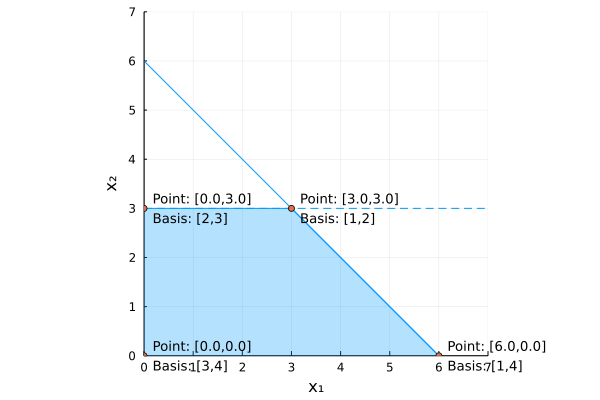

In [21]:
## Plotting constraints
plt = plot(x, c1.(x), color = c_blue,
    xaxis = ("x₁", (0,7)),
    yaxis = ("x₂", (0,7)),
    aspect_ratio = :equal,
    legend = false
)

## Plotting bounds
hline!([bx₂], line = :dash, color = c_blue)

## Plotting axes
vline!([0], color = :black, alpha = 0.6)
hline!([0], color = :black, alpha = 0.6)


## Plotting feasible area
t = range(0,6,length=100)
plot!(t,min.(bx₂,c1.(t)), color = c_blue,
    fillrange = (repeat([0],100),min.(bx₂,c1.(t))),           # parameter to fill an area int he plot        
    fillalpha = 0.3                                           # opacity of the filling
)

## Annotate solutions
for i in 1:size(bfs)[1]
    scatter!([bfs[i,1]],[bfs[i,2]],
    markercolour = c_orange,
    label ="")
    annotate!(bfs[i,1]+0.2,bfs[i,2]+0.2, ("Point: [$(bfs[i,1]),$(bfs[i,2])]", 9, :left))
end

## Annotate bases
for i in 1:size(bfs)[1]
    annotate!(bfs[i,1]+0.2,bfs[i,2]-0.2, ("Basis: [$(bases[feasib_test.>0,:][i,1]),$(bases[feasib_test.>0,:][i,2])]", 9, :left))
end
plt

### (c)

In [23]:
## Objective coefficients defined by the problem
c = [-2 , 1/2,0,0];                   # Objective function costs
dot(c, bfs[2,:])

-12.0

In [24]:
## Forming matrix B and red. cost
xS = [3 , 3 , 0 , 0]              # Initial solution (given by the exercise)
Basis = [1 , 2]                   # Basis corresponding the initial solution
B = A[:,Basis]                    # Matrix B
invB = inv(B)                     # B^-1

2×2 Matrix{Float64}:
 1.0  -1.0
 0.0   1.0

In [25]:
## Improving the solution through x₃ or x₄
d_B = -invB * A[:,3]
d₃ = [d_B; 1; 0]

d_B = -invB * A[:,4]
d₄ = [d_B; 0; 1];

println("Direction d₃ is: $d₃")
println("Direction d₄ is: $d₄")

Direction d₃ is: [-1.0, 0.0, 1.0, 0.0]
Direction d₄ is: [1.0, -1.0, 0.0, 1.0]


In [26]:
## The reduced costs along directions d₃ and d₄ are computed below
r₃ = c' * d₃
r₄ = c' * d₄

println("If we move in direction d₃, we will change the OF by $r₃.")
println("If we move in direction d₄, we will change the OF by $r₄.")

If we move in direction d₃, we will change the OF by 2.0.
If we move in direction d₄, we will change the OF by -2.5.


We can then see that only $d_4$ can improve the current solution, also showing that the current solution is not optimal.

The new point need to be feasible, therefore $xS' + \theta d_4 \geq 0$ => $(3,3,0,0)+\theta (1,-1,0,1)\geq0$

$\theta\leq3$

As we want to move as far as possible, we will then adopt $\theta = 3$

In [27]:
θ = 3;

In [28]:
## New solution
x = round.(xS + θ*d₄,digits = 2)
xS = x                               # xS now receive the new solution

4-element Vector{Float64}:
 6.0
 0.0
 0.0
 3.0

In [29]:
## Forming new matrix B and reduced costs
Basis = [1 , 4]                     # New basis: column 4 replaced column 2 => this can be seen also in the plot
B = A[:,Basis]                      # Matrix B

invB = inv(B)                       # B^-1

c_b = c[Basis];                     # Reduced cost related to the variables in the basis

In [30]:
## Computing the new reduced cost
r = c' - c_b'*invB*A

1×4 adjoint(::Vector{Float64}) with eltype Float64:
 0.0  2.5  2.0  0.0

As all reduced costs are nonnegative, we achieved our optimal solution with basis [1,4] : $(x_1,x_2) = (6,0)$

## Problem 3.3 - Degeneracy

### (a)

In [ ]:
# using Pkg
# Pkg.add("Combinatorics")

In [1]:
## Including the libraries
using JuMP           # JuMP library for creating models 
using Cbc            # Cbc is an open-source linear optimisation solver
using Plots          # Library for plotting
pyplot()             # Preferred plotting backend (several available, see Plots.jl documenation for details)
using LinearAlgebra  # Makes available the dot product

In [2]:
## Define the model in JuMP
m = Model(Cbc.Optimizer)
set_silent(m) # hides the solver log for a cleaner output.             

## Upper bounds
bx₁ = 2.5
bx₂ = 4

## Declaring variables
@variable(m, 0 <= x1 <= bx₁ )
@variable(m, 0 <= x2 <= bx₂ )

## Setting the objective
@objective(m, Max, 2x1 + x2 )

## Adding constraints
@constraint(m, 2x1 + 2x2 <= 9.0 )
@constraint(m, 2x1 - x2 <= 3.0 )
@constraint(m, x1 - x2 <= 1.0 )
@constraint(m, 4x1 - 3x2 <= 5.0 )

## Optimise it
JuMP.optimize!(m)

## Printing the variables values
println("Objective value: ", JuMP.objective_value(m))
println("x1 = ", JuMP.value(x1))
println("x2 = ", JuMP.value(x2))

# Storing the optimal values in a vector
optimal_point = round.([value(x1),value(x2)],digits=2);

Objective value: 7.0
x1 = 2.5
x2 = 2.0
Presolve 4 (0) rows, 2 (0) columns and 8 (0) elements
0  Obj -0 Dual inf 2.9999998 (2)
1  Obj 7
Optimal - objective value 7
Optimal objective 7 - 1 iterations time 0.012


### (b)

First we need to find the basic solutions to see what are degenerated. Therefore we start by defining the standard form polyhedron.

In [3]:
## Matrix A with 6 added variables to form the polyhedron in the standard form (Ax = b):
A =
[2  2  1  0  0  0  0  0;
 2 -1  0  1  0  0  0  0;
 1 -1  0  0  1  0  0  0;
 4 -3  0  0  0  1  0  0;
 1  0  0  0  0  0  1  0;
 0  1  0  0  0  0  0  1]                             

## RHS b
b =
[9 ; 3 ; 1 ; 5 ; 2.5 ; 4]

6-element Vector{Float64}:
 9.0
 3.0
 1.0
 5.0
 2.5
 4.0

#### Finding the possible $I_B$:
To find which are the basic solutions, we can see which constraints are fulfilled to equality, i.e., $Ax^S = b$ being $x^S$ the solution tested. All basic solutions can be found if we separate 6 columns of matrix A at a time and solve the system.

In [4]:
## Let's define all the possible non-basic combinations of columns (C(8,2))
non_bases = [1 2;1 3;1 4;1 5;1 6;1 7;1 8;            # Defined as a 28x2 matrix (28 possible bases with 2 non-basic elements each elements each)
         2 3;2 4;2 5;2 6;2 7;2 8;
         3 4;3 5;3 6;3 7;3 8;
         4 5;4 6;4 7;4 8;
         5 6;5 7;5 8;
         6 7;6 8;
         7 8]

## Now we use setdiff() to gather the basic columns for each non-basic columns combination
bases = zeros(Int,size(non_bases)[1],6)              # Defined as a 28x6 matrix
for i in 1:size(non_bases)[1]
    bases[i,:] = setdiff(1:8,non_bases[i,:])
end

In [5]:
## If we test now basis 6 (in bases[6,:]), we will se that we do not have 6-dimensional LI rows
rank(A[:,bases[6,:]])

5

In [6]:
## We can check that indeed one line is dependent:
A[:,bases[6,:]]

6×6 Matrix{Int64}:
  2  1  0  0  0  0
 -1  0  1  0  0  0
 -1  0  0  1  0  0
 -3  0  0  0  1  0
  0  0  0  0  0  0
  1  0  0  0  0  1

Whenever we have linear dependencies on the matrix formed by the 6 columns selected, we **DO NOT** form a basic solution.

In [9]:
## Therefore we need to test out what are the 6 columns that form a basic solution
rank_bases = zeros(Int,size(bases)[1])
for i in 1:size(bases)[1]
    rank_bases[i] = rank(A[:,bases[i,:]])
end

In [10]:
## We can reduce the bases only for the possibilities spaning 6 dimensions
bases = bases[rank_bases.==6,:]
non_bases = non_bases[rank_bases.==6,:]
rank_bases = zeros(Int,size(bases)[1])
for i in 1:size(bases)[1]
    rank_bases[i] = rank(A[:,bases[i,:]])
end;

In [11]:
## To find the solutions related to each basis, we can solve the systems A[:,bases]\b
solutions = zeros(size(bases))
for i in 1:size(bases)[1]
    solutions[i,:] = A[:,bases[i,:]]\b
end

In [12]:
## Create a matrix to link the bases and the solutions
solutions_x = zeros(size(solutions)[1],8)
for i in 1:size(solutions)[1]
    solutions_x[i,non_bases[i,:]] .= 0
    solutions_x[i,bases[i,:]] .= round.(solutions[i,:],digits=2)
end

To spot degenerated solutions, we check if different bases form the same solution.

In [13]:
## Spot the degenerated solutions
degenerated = zeros(size(solutions)[1])              # vector to indicate if the solutions are degenerated or not

for i in 1:size(solutions)[1]
    counter = zeros(i)                               # counter to check previous solutions
    for j in 1:i
        if solutions_x[j,:] == solutions_x[i,:]      # count when the same solution appears
            counter[j] = 1
        end
    end
    if sum(counter) > 1                              # if solution appears more than once, different bases are generating the same solution
        degenerated[i] = 1                           # in other words, it is degenerated
    end
end

In [14]:
## Degenerated solutions 
solutions_x[degenerated.>0,:]

4×8 Matrix{Float64}:
 2.5  2.0  0.0  -0.0  0.5  1.0  0.0  2.0
 2.0  1.0  3.0   0.0  0.0  0.0  0.5  3.0
 2.5  2.0  0.0   0.0  0.5  1.0  0.0  2.0
 2.0  1.0  3.0   0.0  0.0  0.0  0.5  3.0

In [15]:
## Bases forming the degenerated solutions seen above
bases[degenerated.>0,:]

4×6 Matrix{Int64}:
 1  2  4  5  6  8
 1  2  3  5  7  8
 1  2  3  5  6  8
 1  2  3  4  7  8

### (c)

In [16]:
## Creating the functions to be plotted (as of constraints of the problem)
c1(x) = 4.5 - x                                   # Constraint c1
c2(x) = -3 + 2x                                   # Constraint c2
c3(x) = -1 + x                                    # Constraint c3
c4(x) = -5/3 + 4x/3                               # Constraint c4
z(x) = (dot([2,1], optimal_point) - 2x) ;         # OF

In [17]:
## Range of inputs to the created functions
x = range(-1,5,length=2);                         # between [-1,5] - As we deal only with affine functions, we just need 2 points to define them

In [18]:
## Defining the colors to be used
c_blue = palette(:auto)[1]                         # color :1
c_orange = palette(:auto)[2]                       # color :2
c_green = palette(:auto)[3];                       # color :3

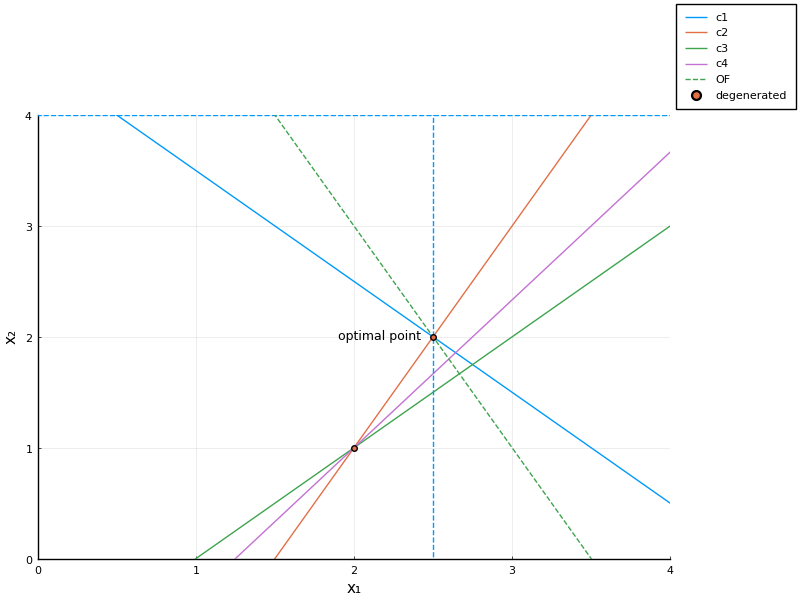

In [19]:
## Plotting constraints
plot(x, c1.(x),
    xaxis = ("x₁", (0,4)),
    yaxis = ("x₂", (0,4)),
    size = (800,600),
    label = "c1",
    legend = :outertopright
)
plot!(x, c2.(x), label = "c2")
plot!(x, c3.(x), label = "c3")
plot!(x, c4.(x), label = "c4")

## Plotting bounds
vline!([bx₁], line = :dash, label = "", color = c_blue)        # put label as "" to not appear in the legend
hline!([bx₂], line = :dash, label = "", color = c_blue)        

## Plotting OF @ optimal point
plot!(x, z.(x), line = :dash, color = c_green, label="OF")

## Plotting one of the degenerated points (Notice that the optimal point is also degenerated)
scatter!([optimal_point[1]], [optimal_point[2]], color = c_orange, label="degenerated")
scatter!([2],[1],markercolour = c_orange,label ="")
annotate!(optimal_point[1]-0.6, optimal_point[2], ("optimal point", 9, :left))

We can see by *overdetermination* that points [2,1] and [2.5,2] are degenerated.